# Dataset

In [6]:
train_test_new <- read.csv("train-test-new.csv")

In [7]:
head(train_test_new)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,56,self-employed,married,university.degree,no,yes,no,cellular,nov,wed,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
2,57,management,married,university.degree,no,no,no,cellular,jul,tue,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
3,36,admin.,married,university.degree,no,yes,no,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
4,45,management,married,high.school,unknown,no,no,cellular,aug,wed,2,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
5,39,admin.,single,university.degree,no,yes,no,cellular,jul,wed,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
6,33,services,married,high.school,no,no,yes,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no


In [8]:
n <- length(train_test_new[,1])
y.class <- rep(0,n)

In [9]:
for (i in 1:n){
    if (train_test_new[i, 20] == "yes"){
        y.class[i] <- 1
    }
}

In [10]:
train_test_all <- cbind(train_test_new[,1:19], y.class)
head(train_test_all)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y.class
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,56,self-employed,married,university.degree,no,yes,no,cellular,nov,wed,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0
2,57,management,married,university.degree,no,no,no,cellular,jul,tue,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
3,36,admin.,married,university.degree,no,yes,no,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0
4,45,management,married,high.school,unknown,no,no,cellular,aug,wed,2,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0
5,39,admin.,single,university.degree,no,yes,no,cellular,jul,wed,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0
6,33,services,married,high.school,no,no,yes,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


In [11]:
train <- train_test_all[1:8000,]
test <- train_test_all[8001:10000,]

# Logistic Regression

In [25]:
result.LR1 <- glm(y.class~., data=train, family=binomial)

In [26]:
summary(result.LR1)


Call:
glm(formula = y.class ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0286  -0.3931  -0.3156  -0.2555   2.8448  

Coefficients: (1 not defined because of singularities)
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  -1.274e+02  7.792e+01  -1.635 0.102048    
age                          -5.921e-03  4.777e-03  -1.240 0.215158    
jobblue-collar                6.226e-02  1.594e-01   0.391 0.696043    
jobentrepreneur               2.104e-01  2.345e-01   0.897 0.369555    
jobhousemaid                  3.492e-01  2.692e-01   1.297 0.194473    
jobmanagement                 2.070e-01  1.715e-01   1.207 0.227460    
jobretired                    6.060e-01  2.116e-01   2.864 0.004184 ** 
jobself-employed             -3.045e-01  2.706e-01  -1.125 0.260413    
jobservices                   1.494e-02  1.719e-01   0.087 0.930706    
jobstudent                    1.882e-02  2.

In [27]:
# Use the model to predict y on the test set
result.LR2<-predict(result.LR1,newdata=test, type="response")

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


In [36]:
summary(result.LR2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01133 0.03812 0.05339 0.10524 0.08793 0.94687 

In [28]:
install.packages("ROCR")

Installing package into 'C:/Users/Jun/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)

also installing the dependencies 'bitops', 'gtools', 'caTools', 'gplots'




package 'bitops' successfully unpacked and MD5 sums checked
package 'gtools' successfully unpacked and MD5 sums checked
package 'caTools' successfully unpacked and MD5 sums checked
package 'gplots' successfully unpacked and MD5 sums checked
package 'ROCR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Jun\AppData\Local\Temp\RtmpEHypB2\downloaded_packages


Warning message:
"package 'ROCR' was built under R version 4.2.2"


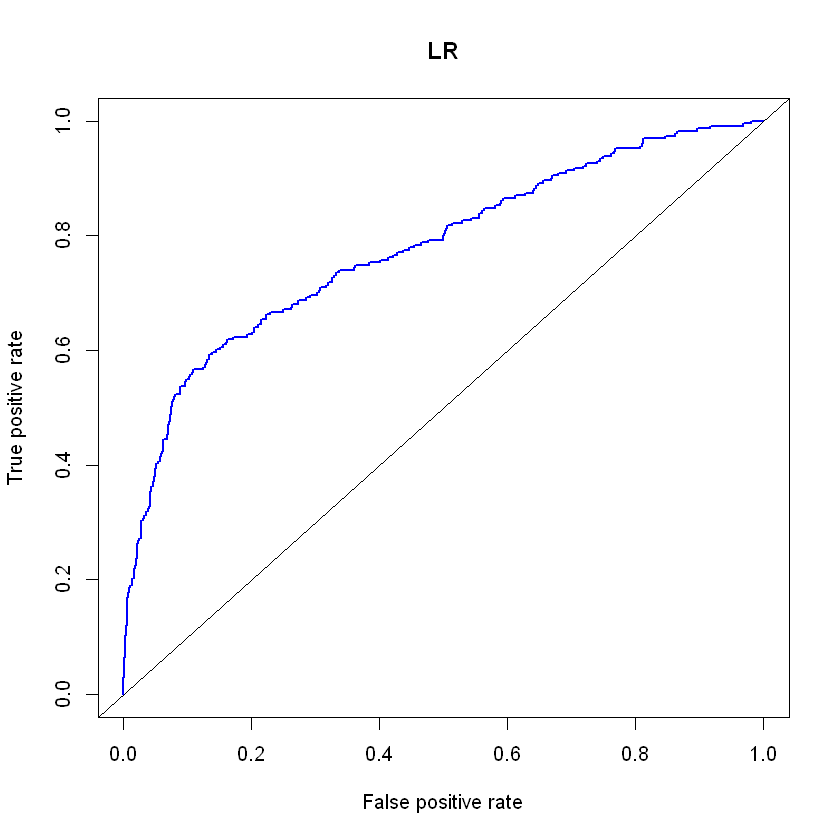

In [29]:
library("ROCR")
fit.LR.pred <-prediction( result.LR2, test[,20])
fit.LR.perf <- performance(fit.LR.pred,"tpr","fpr")
plot( fit.LR.perf,lwd=2,col="blue", main="LR")
abline(a=0,b=1)

# Classification Trees

In [19]:
library(rpart)

In [131]:
install.packages("rpart.plot")
library(rpart.plot)

Installing package into 'C:/Users/Jun/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Jun\AppData\Local\Temp\RtmpEHypB2\downloaded_packages


ERROR: Error: (converted from warning) package 'rpart.plot' was built under R version 4.2.2


In [132]:
result.Tree1<- rpart(y.class~.,  data=train, method="class")

In [133]:
summary(result.Tree1)

Call:
rpart(formula = y.class ~ ., data = train, method = "class")
  n= 8000 

          CP nsplit rel error    xerror       xstd
1 0.05045351      0  1.000000 1.0000000 0.03176141
2 0.01000000      2  0.899093 0.9024943 0.03035497

Variable importance
   nr.employed      euribor3m   emp.var.rate  cons.conf.idx cons.price.idx 
            25             21             14             13             11 
         month       poutcome          pdays 
             7              5              4 

Node number 1: 8000 observations,    complexity param=0.05045351
  predicted class=0  expected loss=0.11025  P(node) =1
    class counts:  7118   882
   probabilities: 0.890 0.110 
  left son=2 (7036 obs) right son=3 (964 obs)
  Primary splits:
      nr.employed  < 5087.65 to the right, improve=220.4763, (0 missing)
      euribor3m    < 1.0785  to the right, improve=201.9377, (0 missing)
      pdays        < 512     to the right, improve=159.4425, (0 missing)
      poutcome     splits as  LLR,    

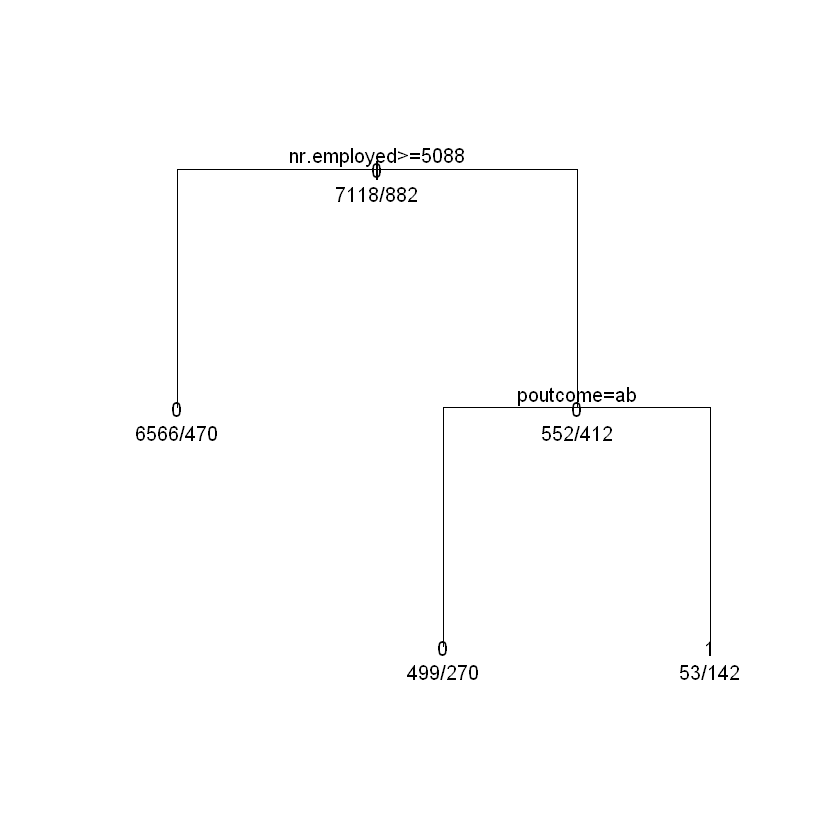

In [134]:
plot(result.Tree1 , uniform=TRUE, margin=0.1)
text( result.Tree1 , use.n=TRUE, all=TRUE)

In [135]:
printcp(result.Tree1)


Classification tree:
rpart(formula = y.class ~ ., data = train, method = "class")

Variables actually used in tree construction:
[1] nr.employed poutcome   

Root node error: 882/8000 = 0.11025

n= 8000 

        CP nsplit rel error  xerror     xstd
1 0.050454      0   1.00000 1.00000 0.031761
2 0.010000      2   0.89909 0.90249 0.030355


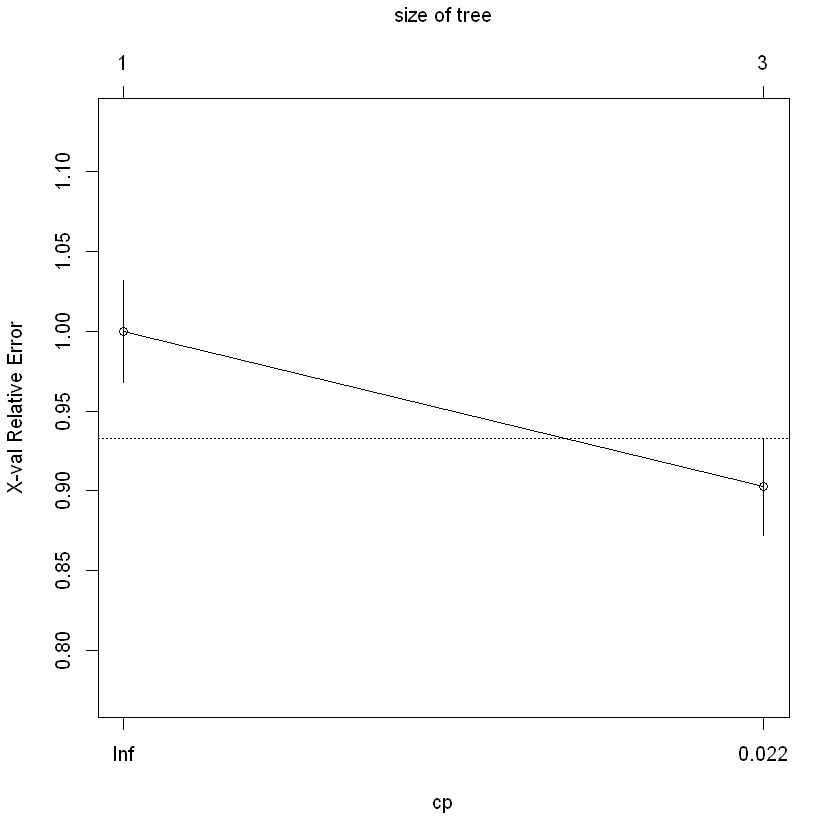

In [136]:
plotcp(result.Tree1)

In [137]:
result.Tree2<-prune(result.Tree1,
cp=result.Tree1$cptable[which.min(result.Tree1$cptable[,"xerror"]),"CP"])

In [138]:
summary(result.Tree2)

Call:
rpart(formula = y.class ~ ., data = train, method = "class")
  n= 8000 

          CP nsplit rel error    xerror       xstd
1 0.05045351      0  1.000000 1.0000000 0.03176141
2 0.01000000      2  0.899093 0.9024943 0.03035497

Variable importance
   nr.employed      euribor3m   emp.var.rate  cons.conf.idx cons.price.idx 
            25             21             14             13             11 
         month       poutcome          pdays 
             7              5              4 

Node number 1: 8000 observations,    complexity param=0.05045351
  predicted class=0  expected loss=0.11025  P(node) =1
    class counts:  7118   882
   probabilities: 0.890 0.110 
  left son=2 (7036 obs) right son=3 (964 obs)
  Primary splits:
      nr.employed  < 5087.65 to the right, improve=220.4763, (0 missing)
      euribor3m    < 1.0785  to the right, improve=201.9377, (0 missing)
      pdays        < 512     to the right, improve=159.4425, (0 missing)
      poutcome     splits as  LLR,    

In [139]:
result.Tree3<-predict(result.Tree1,newdata=test, type="class")
table(test[,20],result.Tree3)

   result.Tree3
       0    1
  0 1761    8
  1  194   37

In [140]:
result.Tree4<-predict(result.Tree1,test,type="prob")

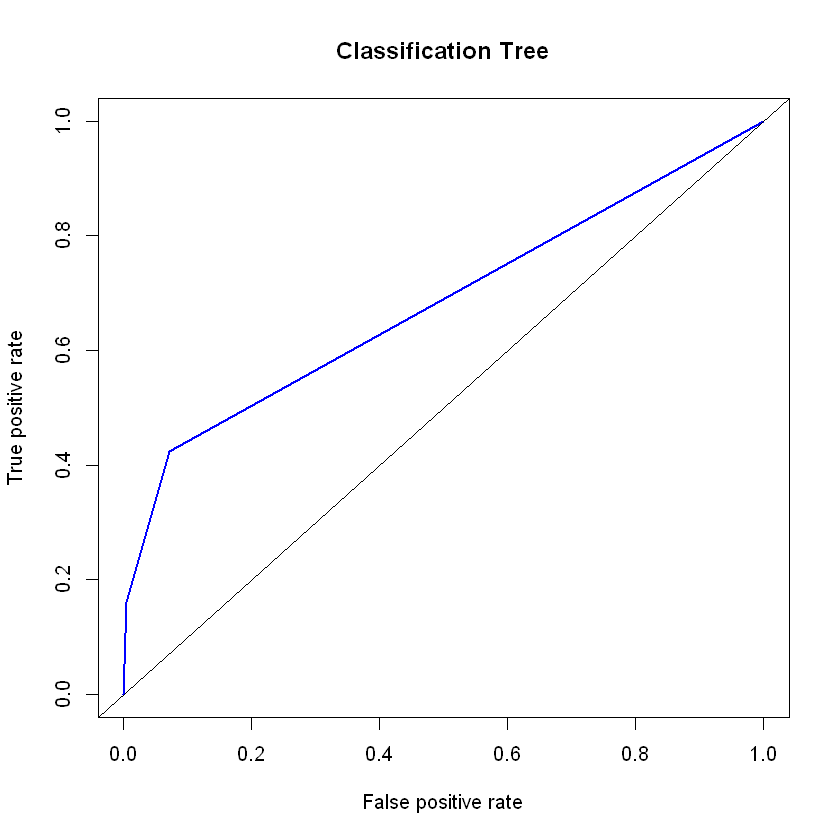

In [141]:
fit.Tree.pred <-prediction( result.Tree4[,2], test[,20])
fit.Tree.perf <- performance(fit.Tree.pred,"tpr","fpr")
plot( fit.Tree.perf,lwd=2,col="blue", main="Classification Tree")
abline(a=0,b=1)

In [142]:
auc.Tree.tmp <- performance(fit.Tree.pred , "auc")
auc.Tree <- as.numeric(auc.Tree.tmp@y.values)
auc.Tree

[1] 0.6814903